In [100]:
from scipy.stats import ttest_ind
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn') 
import os
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [8]:
# Read File 

cust_data = pd.read_csv('customers.csv')
article_data = pd.read_csv('articles.csv')
transactions_data = pd.read_csv('transactions_train.csv')

In [9]:
# Pre Processing 

transactions_data['date'] = pd.to_datetime(transactions_data['t_dat'])
transactions_data['quarter'] = transactions_data['date'].dt.quarter 
transactions_data['month'] = transactions_data['date'].dt.month 

In [10]:
article_data.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [12]:
transactions_data.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,date,quarter,month
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2018-09-20,3,9
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,2018-09-20,3,9
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2018-09-20,3,9


In [13]:
trxn_art = pd.merge(transactions_data, article_data, on='article_id', how ='left')
TAC = pd.merge(trxn_art, cust_data, on='customer_id', how = 'left')
TAC['year'] = TAC['date'].dt.year

In [16]:
TAC.tail(3)

,t_dat,customer_id,article_id,price,sales_channel_id,date,quarter,month,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,year
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,2020-09-22,3,9,918325,Winter shopper,66,Bag,Accessories,1010002,Application/3D,9,Black,4,Dark,5,Black,3209,Bags,C,Ladies Accessories,1,Ladieswear,65,Womens Big accessories,1019,Accessories,"Lightly padded, quilted shopper in a recycled ...",NaN,NaN,ACTIVE,NONE,67.0,a9c9c4db44316f6e62ea17ba5e8b84c1ec3ebeddb3f299...,2020
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,2020-09-22,3,9,833459,Class Aligator Ring Pack,79,Ring,Accessories,1010016,Solid,3,Silver,3,Light,15,Metal,4344,Jewellery,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,Thin metal rings in various designs.,1.0,1.0,ACTIVE,Regularly,21.0,3737324e2574c3bde9ef00336bc767781dbed7e828d51a...,2020
31788323,2020-09-22,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,898573003,0.033881,2,2020-09-22,3,9,898573,Venice,258,Blouse,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1522,Blouse,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1010,Blouses,Blouse in a textured weave with covered button...,1.0,1.0,ACTIVE,Regularly,29.0,47258851e6f73dd2583ef4775814f9b88e43a9e2741c64...,2020


In [101]:
# 2019 data dump

# # TAC_19 = TAC[TAC.year==2019]
# # TAC_19 = TAC_19[["customer_id","product_code"]].drop_duplicates()
# TAC_19
# TAC_19.to_pickle('TAC_19.pkl')

# DATA VIS One


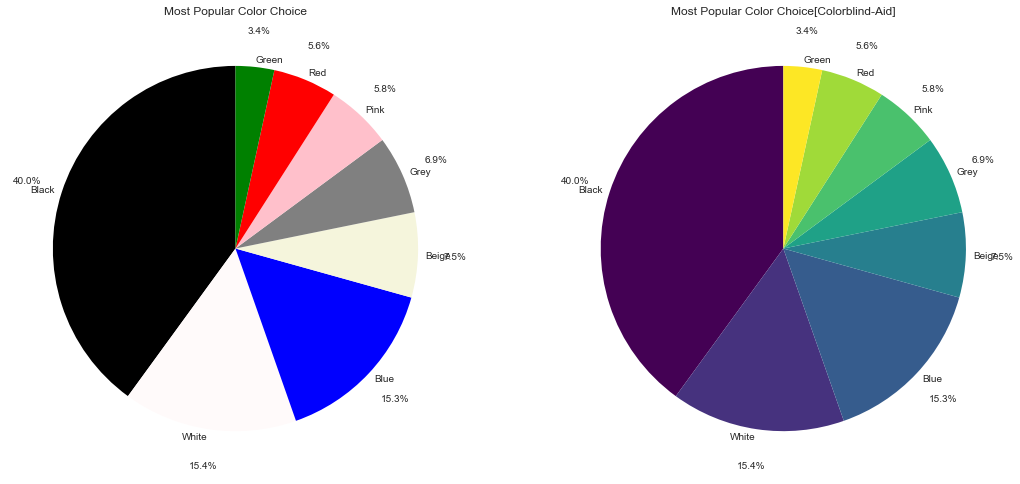

In [110]:
Color_revenue = TAC.groupby(by ="perceived_colour_master_name")['t_dat'].count().sort_values(ascending=False)[:8]

# TODO: First, create your Figure and Axes object like you did above!
my_fig, my_ax = plt.subplots(1,2,figsize = (18,18))

somewhat_better_plot = Color_revenue.plot(kind='pie', 
                                                        autopct = '%1.1f%%',                                                        
                                                        title = 'Most Popular Color Choice',
                                                        ylabel='',
                                                        startangle=90,
                                                        pctdistance = 1.2,
                                                        labeldistance = 1.04,
#                                                         figsize = (8,8),
                                                        ax=my_ax[0],
                                                        labels=Color_revenue.index,
                                                        colors=['Black', 'Snow', 'Blue', 'Beige', 'Grey', 'Pink', 'Red', 'Green'])
#                                                         colormap="viridis")

somewhat_better_plot = Color_revenue.plot(kind='pie', 
                                                        autopct = '%1.1f%%',                                                        
                                                        title = 'Most Popular Color Choice[Colorblind-Aid]',
                                                        ylabel='',
                                                        startangle=90,
                                                        pctdistance = 1.2,
                                                        labeldistance = 1.04,
#                                                         figsize = (8,8),
                                                        ax=my_ax[1],
                                                        labels=Color_revenue.index,
#                                                         colors=['Black', 'Snow', 'Blue', 'Beige', 'Grey', 'Pink', 'Red', 'Green'])
                                                        colormap="viridis")


# TODO: Finally, communicating the legend labels to the axes like before to get
# the legend to show up

In [ ]:
# product_list = ['Shoes', 'Garment Full body', 'Bags', 'Garment Lower body', 'Underwear/nightwear']
# colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen']
# k = 0
# f, ax = plt.subplots(3, 2, figsize=(20, 15))
# for i in range(3):
#     for j in range(2):
#         try:
#             product = product_list[k]
#             articles_for_merge_product = articles_for_merge[articles_for_merge.product_group_name == product_list[k]]
#             series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
#             series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
#             ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
#             ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(), 
#                              (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
#             ax[i, j].set_title(f'Mean {product_list[k]} price in time')
#             ax[i, j].set_xlabel('month')
#             ax[i, j].set_xlabel(f'{product_list[k]}')
#             k += 1
#         except IndexError:
#             ax[i, j].set_visible(False)
# plt.show()

# Data Vis Two

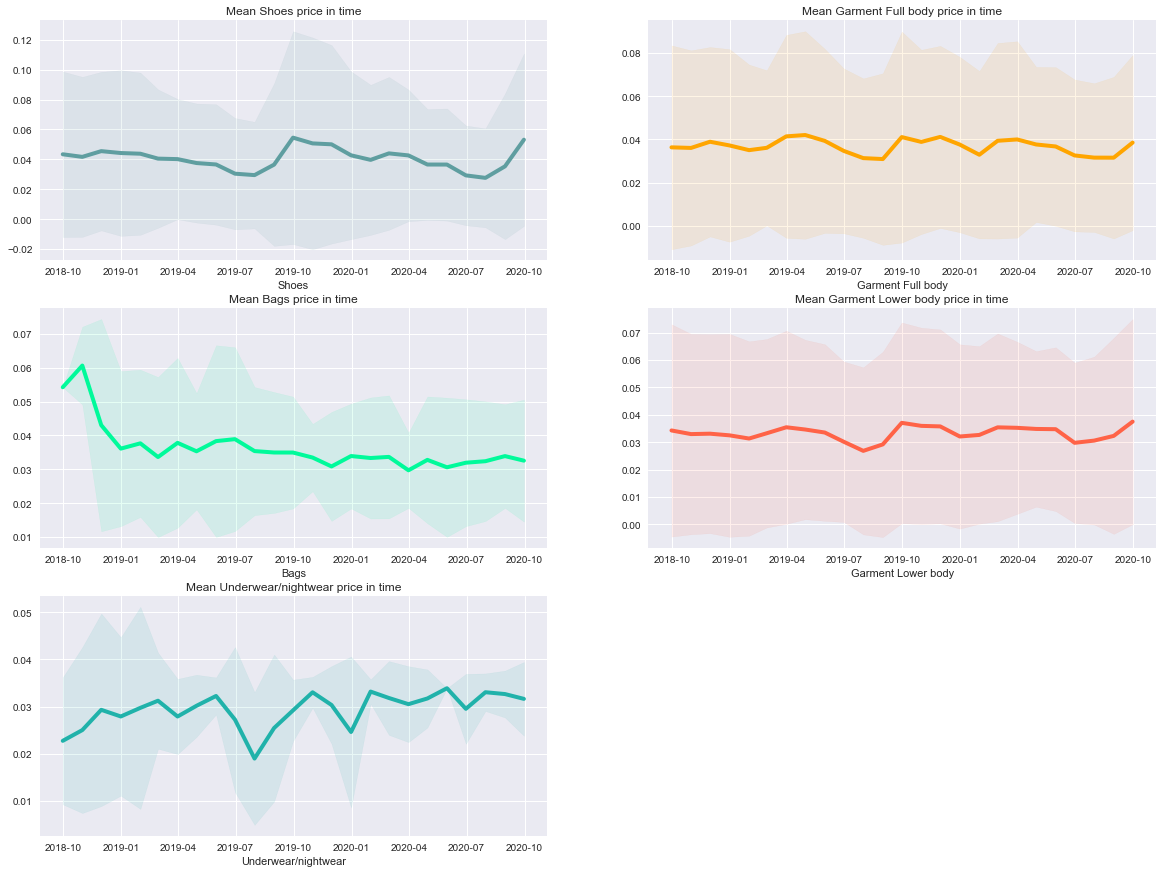

In [103]:
product_list = ['Shoes', 'Garment Full body', 'Bags', 'Garment Lower body', 'Underwear/nightwear']
colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen']
k = 0
f, ax = plt.subplots(3, 2, figsize=(20, 15))

for i in range(3):
    for j in range(2):
        try:
            product = product_list[k]
            plot_data = TAC[TAC.product_group_name == product_list[k]]
            series_mean = plot_data[['date', 'price']].groupby(pd.Grouper(key="date", freq='M')).mean().fillna(0)
            series_std = plot_data[['date', 'price']].groupby(pd.Grouper(key="date", freq='M')).std().fillna(0)
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(), 
                             (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
            ax[i, j].set_title(f'Mean {product_list[k]} price in time')
            ax[i, j].set_xlabel('month')
            ax[i, j].set_xlabel('price')
            ax[i, j].set_xlabel(f'{product_list[k]}')
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)
# plt.title('Scores by group and gender')
plt.show()

In [ ]:
# # 'Black', 'White', 'Beige', 'Grey', 'Blue', 'Pink', 'Lilac Purple',
# #        'Red', 'Mole', 'Orange', 'Metal', 'Brown', 'Turquoise', 'Yellow',
# #        'Khaki green', 'Green', 'undefined', 'Unknown', 'Yellowish Green',
# #        'Bluish Green'
    
# product_list = ['Black', 'Pink', 'Green', 'Grey', 'Red','Brown']
# colors = ['Black', 'Pink', 'Green', 'Grey', 'Red','Brown']
# k = 0
# f, ax = plt.subplots(3, 2, figsize=(20, 15))
# for i in range(3):
#     for j in range(2):
#         try:
#             product = product_list[k]
#             plot_data = TAC[TAC.perceived_colour_master_name == product_list[k]]
#             series_mean = plot_data[['date', 'price']].groupby(pd.Grouper(key="date", freq='M')).mean().fillna(0)
#             series_std = plot_data[['date', 'price']].groupby(pd.Grouper(key="date", freq='M')).std().fillna(0)
#             ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
#             ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(), 
#                              (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
#             ax[i, j].set_title(f'Mean {product_list[k]} price in time')
#             ax[i, j].set_xlabel('month')
#             ax[i, j].set_xlabel(f'{product_list[k]}')
#             k += 1
#         except IndexError:
#             ax[i, j].set_visible(False)
# plt.show()

In [105]:
#  TAC[['perceived_colour_master_name']].groupby(pd.Grouper(key="date", freq='M')).mean().fillna(0)

In [111]:
# sns.displot(TAC, x="age", hue="perceived_colour_master_name", kind="kde", multiple="stack")

In [112]:
# sns.displot(TAC, x="age", hue="club_member_status", kind="kde", multiple="stack")

# Data Vis Three

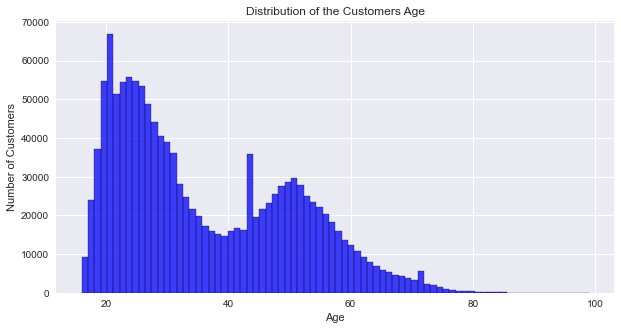

In [117]:
# sns.color_palette("viridis", as_cmap=True)
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=TAC[["customer_id","age"]].drop_duplicates(), x='age', bins=80, color='blue')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Customers')
ax.set_title('Distribution of the Customers Age')
plt.show()


# Data Vis Four

Text(0, 0.5, 'Revenue(Rescaled from orignal data source)')

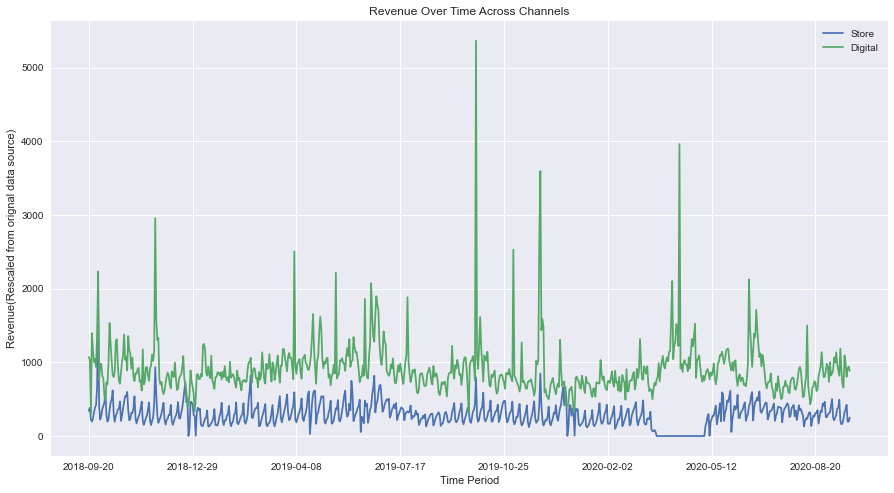

In [115]:
TAC_sls_chl = TAC.groupby(['t_dat','sales_channel_id'])['price'].sum().reset_index().rename(columns={0:'count'})
TAC_sls_chl.head(3)

plot_pivot = TAC_sls_chl.pivot(index='t_dat', columns='sales_channel_id', values='price')
plot_pivot.fillna(0).plot.line(figsize=(15, 8),title='Revenue Over Time Across Channels',legend=(["S","D"]))
plt.legend(['Store', 'Digital'])
plt.xlabel("Time Period")
plt.ylabel("Revenue(Rescaled from orignal data source)")
# plt.title.set_size(40)

In [89]:
# plt.style.use('seaborn') 

# f, ax = plt.subplots(figsize=(15,10))
# plt.xticks(rotation = 45, ha = 'right')
# sns.lineplot(data=TAC_sls_chl, x="t_dat", y="price", hue="sales_channel_id")


# Hypothesis Testing 

In [21]:
def create_customer_summary(trxn, ):
    merchant_db = trxn.groupby(['customer_id','sales_channel_id']).agg(
        revenue          =('price', 'sum'),
        ttl_trxn         =('t_dat', 'nunique'),
        article_id       =('article_id', 'nunique'),
#         sales_channel_id       =('sales_channel_id', 'nunique'),
        first_order_date =('date', 'min'),
        last_order_date  =('date', 'max')    
    ).reset_index().sort_values(by='revenue', ascending=False)

    merchant_db['active_period'] = ((merchant_db['last_order_date']- merchant_db['first_order_date'])/ np.timedelta64(1, 'D'))+1
    merchant_db['ADGT'] = merchant_db['active_period']/merchant_db['ttl_trxn']
    merchant_db['trxn_freq'] = merchant_db['ttl_trxn']/merchant_db['active_period'] 
    merchant_db['ADS'] = (merchant_db['revenue']/merchant_db['ttl_trxn'])
    last_date = max(trxn['date'])
    merchant_db['recency'] = ((last_date - merchant_db['last_order_date'])/ np.timedelta64(1, 'D'))+1
    return merchant_db

In [22]:
total_cust_new = create_customer_summary(transactions_data)
total_cust_new.sort_values('customer_id')

In [66]:
store_adgt =  total_cust_new[(total_cust_new.sales_channel_id==1) & (total_cust_new.active_period>10)]['ADGT'].sample(30,random_state=40)
digital_adgt =  total_cust_new[(total_cust_new.sales_channel_id==2) & (total_cust_new.active_period>10)]['ADGT'].sample(30,random_state=40)

In [67]:
ttest_ind(digital_adgt, store_adgt)

Ttest_indResult(statistic=-0.9783269722078075, pvalue=0.33197579237596364)

[Text(0, 0, 'Digital'), Text(1, 0, 'Store')]

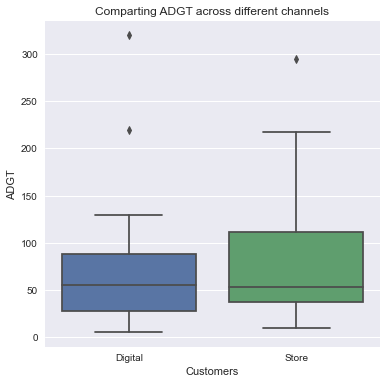

In [97]:
all_arr = [digital_adgt,
           store_adgt]
fig, ax  = plt.subplots(figsize=[6,6])
ax = sns.boxplot(data=all_arr)
# fig.xticks([0,1], ["s","D"], rotation='vertical')
ax.set(xlabel='Customers' ,  ylabel ="ADGT", title=f'Comparting ADGT across different channels')
ax.set_xticklabels(['Digital','Store'])
# ax.legend({"Digital":0,"Store":1},loc="upper left", title="Channel")

In [118]:

# ax, fig = plt.subplots(figsize=[10,5])

# ax = sns.histplot(data=digital_adgt,color = "Blue")
# ax = sns.histplot(data=store_adgt,color = "Red")

# ax.set(xlabel='Number of White Stops', ylabel='Number of Minority Stops',title=f'Stop rates')
# # ax.legend({"Black":1,"Hispanic":2},loc="upper left", title="Race")

# Other Visualisations and Experimentation

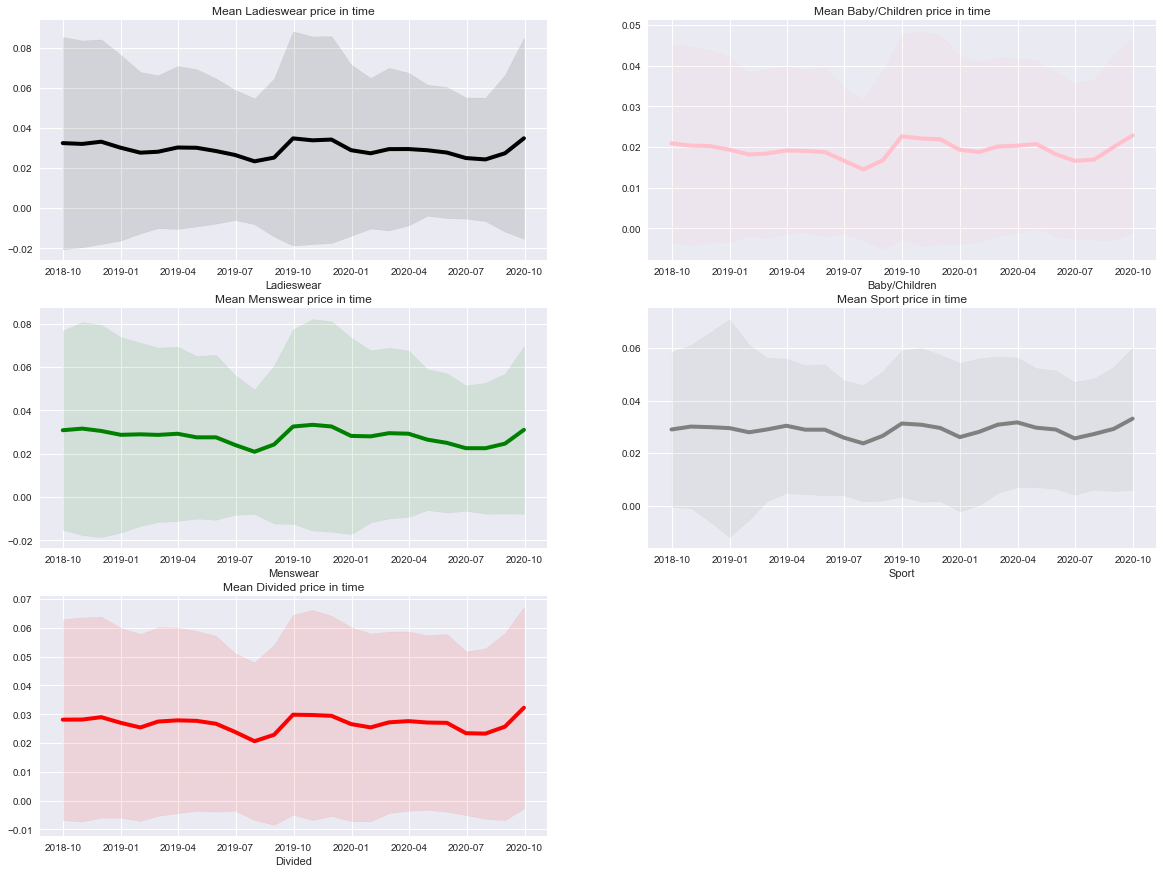

In [16]:
# 'Black', 'White', 'Beige', 'Grey', 'Blue', 'Pink', 'Lilac Purple',
#        'Red', 'Mole', 'Orange', 'Metal', 'Brown', 'Turquoise', 'Yellow',
#        'Khaki green', 'Green', 'undefined', 'Unknown', 'Yellowish Green',
#        'Bluish Green'
    
product_list = article_data['index_group_name'].unique()
colors = ['Black', 'Pink', 'Green', 'Grey', 'Red','Brown']
k = 0
f, ax = plt.subplots(3, 2, figsize=(20, 15))
for i in range(3):
    for j in range(2):
        try:
            product = product_list[k]
            plot_data = TAC[TAC.index_group_name == product_list[k]]
            series_mean = plot_data[['date', 'price']].groupby(pd.Grouper(key="date", freq='M')).mean().fillna(0)
            series_std = plot_data[['date', 'price']].groupby(pd.Grouper(key="date", freq='M')).std().fillna(0)
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(), 
                             (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
            ax[i, j].set_title(f'Mean {product_list[k]} price in time')
            ax[i, j].set_xlabel('month')
            ax[i, j].set_xlabel(f'{product_list[k]}')
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)
plt.show()

<AxesSubplot:ylabel='Frequency'>

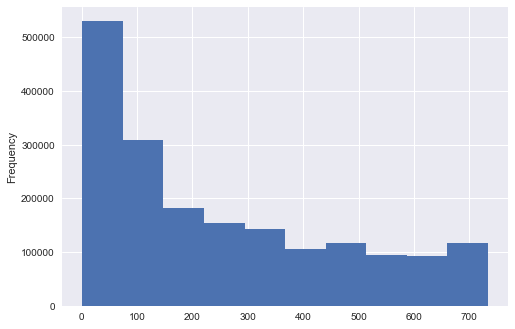

In [35]:
total_cust_new['recency'].plot(kind='hist')

In [60]:
digital_trxn = transactions_data.loc[transactions_data['sales_channel_id']==1].copy()
store_trxn = transactions_data.loc[transactions_data['sales_channel_id']==2].copy()

In [40]:
digital_trxn['date'] = pd.to_datetime(digital_trxn['t_dat'])

In [41]:
# digital_trxn['quarter'] = digital_trxn['date'].dt.quarter 
# digital_trxn['month'] = digital_trxn['date'].dt.month 
# digital_trxn['first_p'] = digital_trxn['date'].min()
# digital_trxzn['last_p'] = digital_trxn['date'].max()

In [42]:
digital_trxn

,t_dat,customer_id,article_id,price,sales_channel_id,date,quarter,month
7,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,688873012,0.030492,1,2018-09-20,3,9
8,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,501323011,0.053373,1,2018-09-20,3,9
10,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,688873020,0.030492,1,2018-09-20,3,9
11,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,688873011,0.030492,1,2018-09-20,3,9
44,2018-09-20,001127bffdda108579e6cb16080440e89bf1250a776c6e...,397068015,0.033881,1,2018-09-20,3,9
...,...,...,...,...,...,...,...,...
31788290,2020-09-22,ff813df6887c2a6d7065aed247bf1db3d6f629eee23798...,806388002,0.013542,1,2020-09-22,3,9
31788294,2020-09-22,ff9e122067c18aac7bd96897bb9550405bb11abcc7e2e0...,860833022,0.025407,1,2020-09-22,3,9
31788300,2020-09-22,ffc2e7c210e3ea602e6d229116773cc0588c929f8cc70b...,858856002,0.042356,1,2020-09-22,3,9
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,2020-09-22,3,9


In [96]:
transactions_data

,t_dat,customer_id,article_id,price,sales_channel_id,date,quarter,month
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2018-09-20,3,9
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,2018-09-20,3,9
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2018-09-20,3,9
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,2018-09-20,3,9
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,2018-09-20,3,9
...,...,...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,2020-09-22,3,9
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,2020-09-22,3,9
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,2020-09-22,3,9
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,2020-09-22,3,9


In [113]:
total_cust_new = create_customer_summary(transactions_data)

In [115]:
total_cust_new.head()

,customer_id,revenue,ttl_trxn,article_id,sales_channel_id,first_order_date,last_order_date,active_period,ADGT,trxn_freq,ADS,recency
1011710,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,57.676407,293,1346,2,2018-09-21,2020-09-15,726.0,2.477816,0.403581,0.196848,8.0
885174,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,50.921186,427,906,2,2018-09-24,2020-09-20,728.0,1.704918,0.586538,0.119253,3.0
20162,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,49.967169,294,807,2,2018-09-20,2020-09-16,728.0,2.476190,0.403846,0.169956,7.0
133564,191071b0e1f2e94a557f1a0b4cea3de55faf1581b1f464...,47.682017,117,565,2,2018-09-21,2020-09-19,730.0,6.239316,0.160274,0.407539,4.0
962395,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,47.662000,231,1068,2,2018-09-29,2020-09-22,725.0,3.138528,0.318621,0.206329,1.0


In [104]:
total_cust.head()

,customer_id,sales_channel_id,revenue,ttl_trxn,article_id,first_order_date,last_order_date,active_period,ADGT,trxn_freq,ADS,recency
1199685,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,2,50.307254,424,879,2018-09-24,2020-09-20,728.0,1.716981,0.582418,0.118649,3.0
1370845,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,2,50.208797,184,1072,2018-09-22,2020-09-15,725.0,3.940217,0.253793,0.272874,8.0
27378,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,2,48.417390,276,737,2018-09-20,2020-09-16,728.0,2.637681,0.379121,0.175425,7.0
1304074,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,2,47.512169,230,1060,2018-09-29,2020-09-22,725.0,3.152174,0.317241,0.206575,1.0
181066,191071b0e1f2e94a557f1a0b4cea3de55faf1581b1f464...,2,47.393949,116,562,2018-09-21,2020-09-19,730.0,6.293103,0.158904,0.408569,4.0


In [ ]:
sns.displot(total_cust[total_cust['ADS']<1], x="ADS", hue="sales_channel_id", kind="kde", multiple="stack")

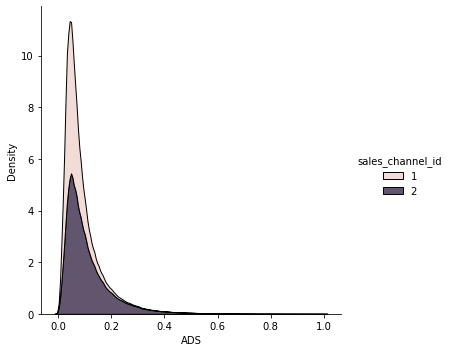

In [122]:
sns.displot(total_cust[total_cust['ADS']<1], x="ADS", hue="sales_channel_id", kind="kde", multiple="stack")

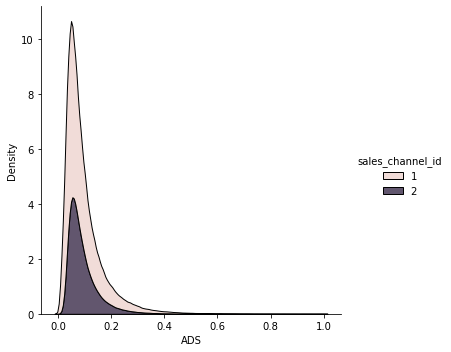

In [121]:
sns.displot(total_cust_new[total_cust_new['ADS']<1], x="ADS", hue="sales_channel_id", kind="kde", multiple="stack")

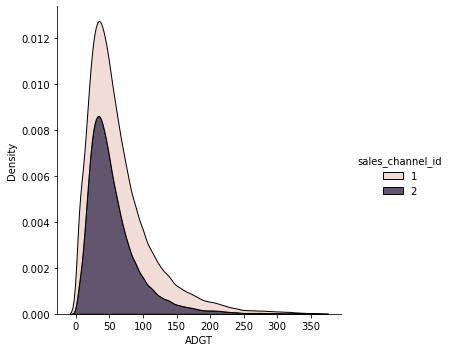

In [118]:

sns.displot(total_cust_new[total_cust_new['active_period']>5], x="ADGT", hue="sales_channel_id", kind="kde", multiple="stack")

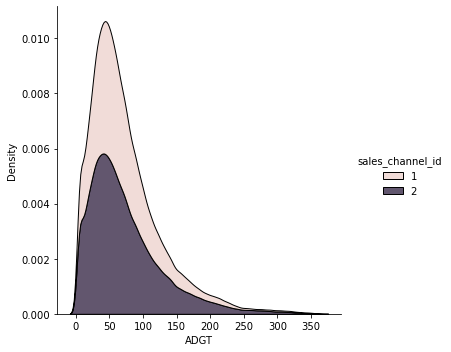

In [103]:

sns.displot(total_cust[total_cust['active_period']>5], x="ADGT", hue="sales_channel_id", kind="kde", multiple="stack")

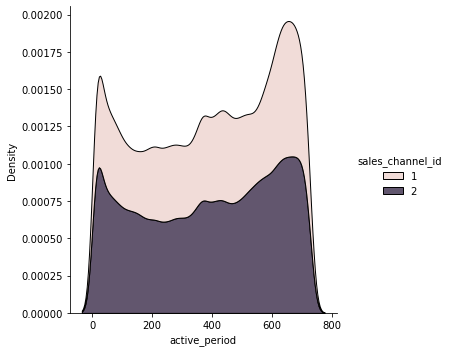

In [106]:
sns.displot(total_cust[total_cust['active_period']>5], x="active_period", hue="sales_channel_id", kind="kde", multiple="stack")

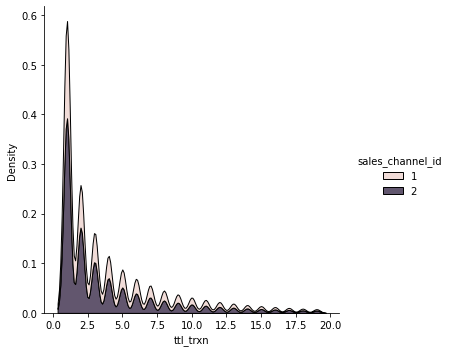

In [111]:
sns.displot(total_cust[total_cust['ttl_trxn']<20], x="ttl_trxn", hue="sales_channel_id", kind="kde", multiple="stack")

In [112]:
def create_customer_summary(trxn, ):
    merchant_db = trxn.groupby(['customer_id']).agg(
        revenue          =('price', 'sum'),
        ttl_trxn         =('t_dat', 'nunique'),
        article_id       =('article_id', 'nunique'),
        sales_channel_id       =('sales_channel_id', 'nunique'),
        first_order_date =('date', 'min'),
        last_order_date  =('date', 'max')    
    ).reset_index().sort_values(by='revenue', ascending=False)

    merchant_db['active_period'] = ((merchant_db['last_order_date']- merchant_db['first_order_date'])/ np.timedelta64(1, 'D'))+1
    merchant_db['ADGT'] = merchant_db['active_period']/merchant_db['ttl_trxn']
    merchant_db['trxn_freq'] = merchant_db['ttl_trxn']/merchant_db['active_period'] 
    merchant_db['ADS'] = (merchant_db['revenue']/merchant_db['ttl_trxn'])
    last_date = max(trxn['date'])
    merchant_db['recency'] = ((last_date - merchant_db['last_order_date'])/ np.timedelta64(1, 'D'))+1
    return merchant_db

In [63]:
digital_cust = create_customer_summary(digital_trxn)
store_cust  = create_customer_summary(store_trxn)


In [66]:
digital_cust.sample(10, random_state=42)

,customer_id,revenue,ttl_trxn,article_id,sales_channel_id,first_order_date,last_order_date,active_period,ADGT,trxn_freq,ADS,recency
385893,85fd42dee06070b0a368b95d8a868e616f94583e7def2f...,0.025407,1,1,1,2020-02-11,2020-02-11,1.0,1.000,1.000000,0.025407,225.0
279701,61202cb0182df6cec92f65369fda10ccadf97a08133963...,0.059288,1,2,1,2019-01-20,2019-01-20,1.0,1.000,1.000000,0.059288,612.0
67319,175eb4ffa26e856d16d437321ee232e5f6190080c19af8...,0.423186,2,12,1,2019-09-05,2019-11-29,86.0,43.000,0.023256,0.211593,299.0
375281,8251ade0401e7690abaa0f4b562c151b4c3a66361a35ca...,0.135508,1,5,1,2019-10-12,2019-10-12,1.0,1.000,1.000000,0.135508,347.0
510819,b13dc8ad947718e22adc01b14e77e58348b771bfc44e10...,0.042305,2,4,1,2020-06-18,2020-08-27,71.0,35.500,0.028169,0.021153,27.0
130182,2d404b1559d98a7a70cabdcee92f21158567ef2a121770...,0.004864,1,1,1,2020-02-21,2020-02-21,1.0,1.000,1.000000,0.004864,215.0
168822,3aa54c020ed884a752e13c786368296893fcbc3c2a5ffb...,0.076220,1,3,1,2019-12-03,2019-12-03,1.0,1.000,1.000000,0.076220,295.0
639807,de3aead521cfa2317b2d68b25532f7504485a2f16d5bec...,0.223153,2,9,1,2019-04-20,2020-06-25,433.0,216.500,0.004619,0.111576,90.0
46801,104a2008268b4671d00e5ddd395b21ad1c64cf68692ffe...,4.297729,32,109,1,2018-10-22,2020-03-12,508.0,15.875,0.062992,0.134304,195.0
96301,21621230b6ff0d99dc3f68ace98765916ce07affa30f65...,0.050814,1,2,1,2019-03-05,2019-03-05,1.0,1.000,1.000000,0.050814,568.0


In [67]:
store_cust.sample(10, random_state=42)

,customer_id,revenue,ttl_trxn,article_id,sales_channel_id,first_order_date,last_order_date,active_period,ADGT,trxn_freq,ADS,recency
302784,460f6a09884ab237c26947fb31e691eed60ef665ba8ac8...,0.404729,10,13,1,2018-09-26,2020-05-07,590.0,59.000000,0.016949,0.040473,139.0
79274,12481dbd70df048fa895f74b084c34579e8cea652aec85...,0.299797,2,11,1,2019-06-14,2019-06-18,5.0,2.500000,0.400000,0.149898,463.0
692670,a0083567f0acfcb549e1151e1eaa2832e165747ce76ceb...,0.357390,4,13,1,2018-10-09,2020-07-29,660.0,165.000000,0.006061,0.089347,56.0
322737,4aa3c3e15b32e7e9e988cda9f2b3c77d6c59f67ffacf0b...,1.744593,21,40,1,2018-09-24,2020-09-20,728.0,34.666667,0.028846,0.083076,3.0
114071,1a42130bfab1c107567ccfd37bb143990ed450fe3b5732...,0.211678,1,2,1,2020-05-07,2020-05-07,1.0,1.000000,1.000000,0.211678,139.0
114706,1a674bd2d810a8aabdd5a6c00c87229e1de287591561ba...,0.055678,1,6,1,2019-02-22,2019-02-22,1.0,1.000000,1.000000,0.055678,579.0
477408,6e35fd52ff299dbfde0298eff94f491bd2163e5102547d...,2.625356,6,62,1,2018-09-25,2019-07-21,300.0,50.000000,0.020000,0.437559,430.0
385525,59193609bf3753e97023d0bff067c7ec47f257208639b5...,0.132119,4,5,1,2019-05-04,2020-09-01,487.0,121.750000,0.008214,0.033030,22.0
935009,d7e083624fe8593b29639c095ef3b86d8d004909e61c37...,0.626797,2,17,1,2018-11-05,2019-05-05,182.0,91.000000,0.010989,0.313398,507.0
255393,3b0948ee1f9d92836bba5d44c64a8ac029f6c4d6cc7587...,0.128729,3,5,1,2020-03-05,2020-07-17,135.0,45.000000,0.022222,0.042910,68.0


In [ ]:
store_cust[]

<AxesSubplot:ylabel='Frequency'>

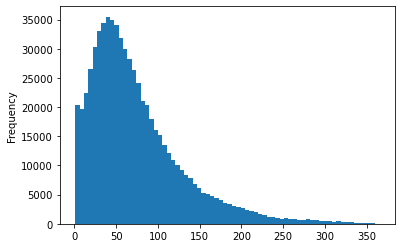

In [88]:
store_cust[store_cust['active_period']>5]['ADGT'].plot(kind='hist',bins= 70)

<AxesSubplot:ylabel='Frequency'>

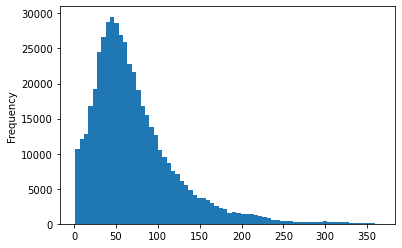

In [87]:
digital_cust[digital_cust['active_period']>5]['ADGT'].plot(kind='hist',bins= 70)

<AxesSubplot:ylabel='Frequency'>

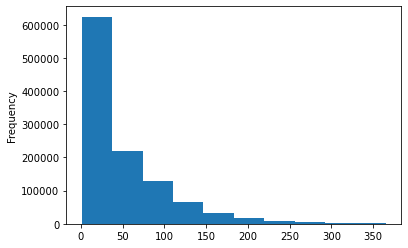

In [69]:
store_cust['ADGT'].plot(kind='hist')

<AxesSubplot:>

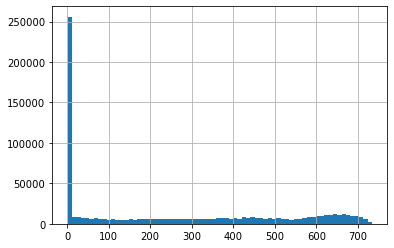

In [78]:
digital_cust[digital_cust['active_period']>0]['active_period'].hist(bins=70)

<AxesSubplot:>

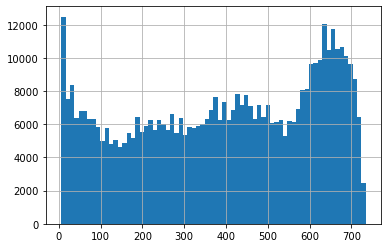

In [76]:
digital_cust[digital_cust['active_period']>5]['active_period'].hist(bins=70)

In [74]:
digital_cust[digital_cust['active_period']>1][]

,customer_id,revenue,ttl_trxn,article_id,sales_channel_id,first_order_date,last_order_date,active_period,ADGT,trxn_freq,ADS,recency
86329,1df07f916d7f648458702bd0b612caee88f1fb4cd1b660...,25.390492,95,736,1,2018-09-22,2020-09-12,722.0,7.600000,0.131579,0.267268,11.0
653120,e2e398ce5bd2eb4e4a60611dc33b04abd5196200cc39e6...,13.932780,104,361,1,2018-10-16,2020-09-16,702.0,6.750000,0.148148,0.133969,7.0
201292,45fb5237b5accbdf71fbdc154c71a3645c7f1e0ac1863d...,13.318000,91,336,1,2018-09-20,2020-09-21,733.0,8.054945,0.124147,0.146352,2.0
410157,8e6b0776da2701be4591e5f6c5022442d39b734db9c254...,11.506458,31,358,1,2019-10-29,2020-07-30,276.0,8.903226,0.112319,0.371176,55.0
735247,ff57b526b9f32d2faaa90677416c0aea113c1c98f934ca...,11.015678,47,308,1,2018-10-11,2020-09-10,701.0,14.914894,0.067047,0.234376,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
667134,e7d0fd9e4d6f640b807c71e98bf0f68cf634a38180664e...,0.005034,2,3,1,2018-12-10,2018-12-12,3.0,1.500000,0.666667,0.002517,651.0
131831,2dcd6caa4eb59fe6063191124ebd080a13a47685cda256...,0.004712,2,3,1,2019-07-18,2019-09-27,72.0,36.000000,0.027778,0.002356,362.0
627839,da11b72bc3aa27e946f8f33acc479942974ccb392d242b...,0.004220,2,2,1,2019-11-26,2020-01-06,42.0,21.000000,0.047619,0.002110,261.0
474502,a49f7cd264e1ff52fb4998522fb2a61d83e03dc148ba57...,0.003356,2,2,1,2019-06-19,2019-07-04,16.0,8.000000,0.125000,0.001678,447.0


In [53]:
# merchant_db['active_period'] = ((merchant_db['last_order_date']- merchant_db['first_order_date'])/ np.timedelta64(1, 'D'))+1
# merchant_db['ADGT'] = merchant_db['active_period']/merchant_db['ttl_trxn']
# merchant_db['trxn_freq'] = merchant_db['ttl_trxn']/merchant_db['active_period'] 
# merchant_db['ADS'] = (merchant_db['revenue']/merchant_db['ttl_trxn'])
# last_date = max(digital_trxn['date'])
# merchant_db['recency'] = ((last_date - merchant_db['last_order_date'])/ np.timedelta64(1, 'D'))+1


In [54]:
merchant_db

,customer_id,revenue,ttl_trxn,article_id,sales_channel_id,first_order_date,last_order_date,active_period,ADGT,trxn_freq,ADS,recency
86329,1df07f916d7f648458702bd0b612caee88f1fb4cd1b660...,25.390492,95,736,1,2018-09-22,2020-09-12,722.0,7.600000,0.131579,0.267268,11.0
653120,e2e398ce5bd2eb4e4a60611dc33b04abd5196200cc39e6...,13.932780,104,361,1,2018-10-16,2020-09-16,702.0,6.750000,0.148148,0.133969,7.0
201292,45fb5237b5accbdf71fbdc154c71a3645c7f1e0ac1863d...,13.318000,91,336,1,2018-09-20,2020-09-21,733.0,8.054945,0.124147,0.146352,2.0
410157,8e6b0776da2701be4591e5f6c5022442d39b734db9c254...,11.506458,31,358,1,2019-10-29,2020-07-30,276.0,8.903226,0.112319,0.371176,55.0
735247,ff57b526b9f32d2faaa90677416c0aea113c1c98f934ca...,11.015678,47,308,1,2018-10-11,2020-09-10,701.0,14.914894,0.067047,0.234376,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
208964,48a3a2afda539d63f27c44c4fca6076a8582489299a058...,0.000780,1,1,1,2020-06-23,2020-06-23,1.0,1.000000,1.000000,0.000780,92.0
466161,a1c392de2f181fe9575721d44a6f115427e550e5feabd1...,0.000763,1,1,1,2019-12-19,2019-12-19,1.0,1.000000,1.000000,0.000763,279.0
205726,478665732d9345aa3d578973987ffd86ba4e03d0188b1b...,0.000763,1,1,1,2019-12-21,2019-12-21,1.0,1.000000,1.000000,0.000763,277.0
308293,6af8db1b10ed79956b57954353c4f7df7cab7429e17275...,0.000610,1,1,1,2019-12-05,2019-12-05,1.0,1.000000,1.000000,0.000610,293.0


<AxesSubplot:ylabel='Frequency'>

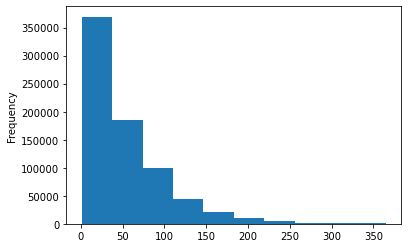

In [56]:
merchant_db['ADGT'].plot(kind='hist')

In [50]:
((merchant_db['last_order_date']- merchant_db['first_order_date'])

86329     721.0
653120    701.0
201292    732.0
410157    275.0
735247    700.0
          ...  
208964      0.0
466161      0.0
205726      0.0
308293      0.0
196186      0.0
Length: 737118, dtype: float64